In [1]:
import dask.dataframe as dd
from dask.distributed import Client
import os
import dask

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 7.41 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34755,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 7.41 GiB
Comm: tcp://127.0.0.1:42605,Total threads: 2
Dashboard: http://127.0.0.1:40867/status,Memory: 1.85 GiB
Nanny: tcp://127.0.0.1:42967,


In [4]:
%run prep.py -d flights

- Downloading NYC Flights dataset... done
- Extracting flight data... done
- Creating json data... done
** Created flights dataset! in 9.23s**


In [3]:
ddf = dd.read_csv(
    os.path.join("data", "nycflights", "*.csv"),
    parse_dates={"Date": [0, 1, 2]},
    dtype={"TailNum": str, "CRSElapsedTime": float, "Cancelled": bool},
)

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


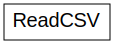

In [4]:
ddf.visualize()

In [24]:
len(ddf)

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projec

2611892

In [25]:
ddf.head()

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)
/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [5]:
%%time
result = ddf.DepDelay.max()
result.compute()

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range

In [28]:
result = ddf.shape

In [30]:
result[0].compute()

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projec

2611892

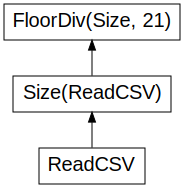

In [31]:
result[0].visualize()

In [38]:
ddf.columns

Index(['Date', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


In [6]:
dask.config.set(scheduler="synchronous")

In [37]:
len(ddf[ddf.Cancelled])

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range

In [6]:
result = ddf.groupby("Origin").Cancelled.sum()
result.compute()

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range

In [7]:
result = ddf.groupby("Origin").DepDelay.mean()
result.compute()

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range

In [ ]:
result = ddf.groupby("DayOfWeek").DepDelay.mean()
result.compute()

/home/user/Стільниця/python/my projects/uni_vlasov_labs/Uni_labs/.venv/lib/python3.9/site-packages/dask/dataframe/io/csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range